<a href="https://colab.research.google.com/github/Hena-123/095_HenaPatel/blob/main/lab2_DataProcessingTasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling the missing value**

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 

In [ ]:
data = pd.read_csv('Data_for_Missing_Values.csv') 
print("\nData :\n",data)


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
X = data.iloc[:, :-1].values   
Y = data.iloc[:, -1].values 
#print("\n\nInput : \n", X) 
#print("\n\nOutput: \n", Y) 

In [ ]:
# Method-1 : Removing data
  # ‘any’ : If any NA values are present, drop that row or column.
  # ‘all’ : If all values are NA, drop that row or column.
data.dropna(how='all',inplace=True)
print("\nNew Data :",data)


New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
#Method-2 : Imputation
new_X = data.iloc[:, :-1].values 
new_Y = data.iloc[:, -1].values 

# missing_values: int, float, str, np.nan or None, default=np.nan
#strategy: mean, median, most_frequent, constant
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(new_X[:, 1:3]) 
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3]) 
  
# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X) 
print("\nData statistics\n",data.describe())



New Input with Mean Value for NaN : 

 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 62900.0]
 ['France' 35.0 58000.0]
 ['Spain' 39.4 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


As you can see here Mean for salary feature is 62900.00 that is copied to index 5th for(Germany,40.0,NaN) at NaN place.

# **Data Transformation**

In [ ]:
# Step 1: Import Libraries

import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Step 2: Load Data
        
datasets = pd.read_csv('Exercise-CarData.csv') 
print("\nData :\n",datasets)
#print("\nData statistics\n",datasets.describe())

# Step 3: Seprate Input and Output attributes

# All rows, all columns except last 
X = datasets.iloc[:, :-1].values 
  
# Only last column  
Y = datasets.iloc[:, -1].values 

#print("\n\nInput : \n", X) 
#print("\n\nOutput: \n", Y) 

X_new = datasets.iloc[:,1:3].values
print("\n\nX for transformation : \n", X_new)


Data :
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


X for transformation : 
 [[13500.    23.]
 [13750.    23.]
 [13950.    24.]
 ...
 [ 850

### **Min-Max Normalization**

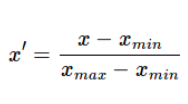

Here for example, price[0]= 13500.0 that is x, x_min=4350.0, x_max=32500.0

So, x' = (13500.0-4350.0)/(32500.0-4350.0) = 0.325044405

So, here in Min-Max Normalizarion Output value within the range of [0-1] means all values in the same unit.

In [ ]:
ages = []
prices = []
for each in X_new:
  prices.append(each[0])
  ages.append(each[1])
print(prices)
print(ages)
print(min(prices))
print(max(prices))

[13500.0, 13750.0, 13950.0, 14950.0, 13750.0, 12950.0, 16900.0, 18600.0, 21500.0, 12950.0, 20950.0, 19950.0, 19600.0, 21500.0, 22500.0, 22000.0, 22750.0, 17950.0, 16750.0, 16950.0, 15950.0, 16950.0, 15950.0, 16950.0, 16250.0, 15950.0, 17495.0, 15750.0, 16950.0, 17950.0, 12950.0, 15750.0, 15950.0, 14950.0, 15500.0, 15750.0, 15950.0, 14950.0, 15750.0, 14750.0, 13950.0, 16750.0, 13950.0, 16950.0, 16950.0, 19000.0, 17950.0, 15800.0, 17950.0, 21950.0, 17950.0, 15750.0, 20500.0, 21950.0, 15500.0, 13250.0, 15250.0, 15250.0, 18950.0, 15999.0, 14950.0, 16500.0, 18750.0, 17950.0, 17950.0, 16950.0, 18950.0, 14950.0, 22250.0, 15950.0, 15950.0, 12995.0, 18950.0, 15750.0, 19950.0, 16950.0, 18750.0, 18450.0, 16895.0, 14900.0, 18950.0, 17250.0, 15450.0, 17950.0, 16650.0, 17450.0, 14900.0, 17950.0, 15950.0, 21950.0, 16450.0, 22250.0, 19950.0, 15950.0, 18900.0, 19950.0, 15950.0, 15950.0, 18750.0, 17450.0, 18990.0, 16250.0, 18500.0, 18500.0, 19450.0, 16950.0, 18800.0, 17450.0, 17950.0, 32500.0, 31000.0, 



Scaled X : 
 [[0.3250444  0.27848101]
 [0.3339254  0.27848101]
 [0.3410302  0.29113924]
 ...
 [0.14742451        nan]
 [0.10301954 0.87341772]
 [0.09236234 0.94936709]]


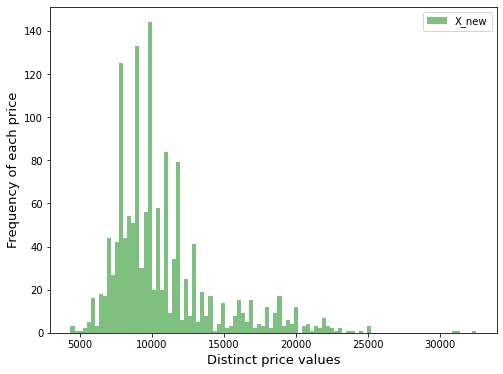

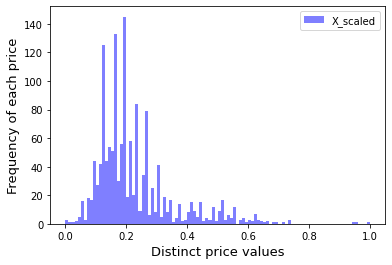

In [ ]:
# Step 4 : Perform scaling on age and price

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)
#print(type(X_scaled))
#print(type(X_scaled[0]))
#print(X_scaled[:,0:1])

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(X_new[:,0:1],histtype ='bar',bins=100, alpha=0.5,color ='green',label ='X_new')
plt.legend(loc='upper right')
plt.xlabel('Distinct price values',size=13)
plt.ylabel('Frequency of each price',size=13)
plt.show()

plt.hist(X_scaled[:,0:1],histtype ='bar', bins=100, alpha=0.5,color ='blue',label ='X_scaled')
plt.legend(loc='upper right')
plt.xlabel('Distinct price values',size=13)
plt.ylabel('Frequency of each price',size=13)
plt.show()

### **Standardization ( Z-Score)**

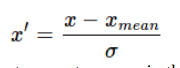

**Standard deviation**

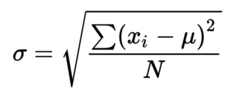

Here μ is mean, xi - value of feature, N - total no of samples

**Mean**

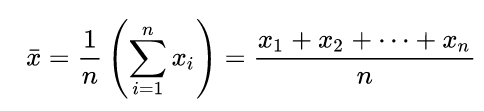

In [ ]:
def variance(data):
...     n = len(data)
...     mean = sum(data) / n
...     deviations = [(x - mean) ** 2 for x in data]
...     variance = sum(deviations) / n
...     return variance
variance(prices)

13145711.325750075

Here for example, price[0]=13500

x̄ = (13500.0+...+6950.0)/1436 = 10730.824512535

σ = √ (13145711.325750075) = 3625.701494297

x' = (13500 - 10730.824512535)/3625.701494297 = 0.763762679

In [ ]:
# Step 5 : Perform standardization on age and salary

std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268 -1.75818903]
 [ 0.83271485 -1.75818903]
 [ 0.88787659 -1.70437596]
 ...
 [-0.6152808          nan]
 [-0.96004167  0.7710253 ]
 [-1.04278428  1.09390373]]


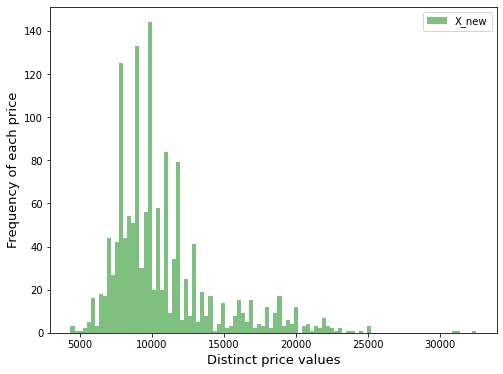

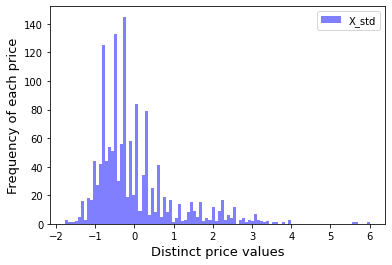

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(X_new[:,0:1],histtype ='bar',bins=100, alpha=0.5,color ='green',label ='X_new')
plt.legend(loc='upper right')
plt.xlabel('Distinct price values',size=13)
plt.ylabel('Frequency of each price',size=13)
plt.show()

plt.hist(X_std[:,0:1],histtype ='bar', bins=100, alpha=0.5,color ='blue',label ='X_std')
plt.legend(loc='upper right')
plt.xlabel('Distinct price values',size=13)
plt.ylabel('Frequency of each price',size=13)
plt.show()

# **Handling Categorical Data**

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
datasets = pd.read_csv('Data_for_Categorical_Values.csv') 
print("\nData :\n",datasets)
#print("\nData statistics\n",datasets.describe())


Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No


In [ ]:
X = datasets.iloc[:, :-1].values 
Y = datasets.iloc[:, -1].values 
#print("\n\nInput : \n", X)
#print("\n\nOutput: \n", Y)

### **Label Encoding**

Here 0th column is having value as string which is not understandable by model, so we need to convert it to numerical form which is done by Label-Encoder.

In [ ]:
le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X) 



Input : 
 [[0 44 72000]
 [2 27 48000]
 [1 30 54000]
 [2 38 61000]
 [1 40 68000]
 [0 35 58000]
 [2 39 52000]
 [0 48 79000]
 [1 50 83000]
 [0 37 67000]
 [2 45 55000]]


### **One hot Encoding**

We need to split the column into multiple columns. The numbers are replaced by 0 and 1 depending on which column has what values.

Here we have splited Country column into 3 columns, France, Germany, Spain and give 0 and 1 value to each 3 column accordingly if that row has particular value or not.

In [ ]:
dummy = pd.get_dummies(datasets['Country'])
print("\n\nDummy :\n",dummy)

# axis{0 or ‘index’, 1 or ‘columns’}
datasets = datasets.drop(['Country','Purchased'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets)



Dummy :
     France  Germany  Spain
0        1        0      0
1        0        0      1
2        0        1      0
3        0        0      1
4        0        1      0
5        1        0      0
6        0        0      1
7        1        0      0
8        0        1      0
9        1        0      0
10       0        0      1


Final Data :
     France  Germany  Spain  Age  Salary
0        1        0      0   44   72000
1        0        0      1   27   48000
2        0        1      0   30   54000
3        0        0      1   38   61000
4        0        1      0   40   68000
5        1        0      0   35   58000
6        0        0      1   39   52000
7        1        0      0   48   79000
8        0        1      0   50   83000
9        1        0      0   37   67000
10       0        0      1   45   55000


# **Feature Selection Correlation**

If independent feature is highly correlated with dependent feature, we need not drop that feature because it places an important role in training the model.

But, if two or more indepenedent feature is highly correlated with each other, then we remove those feature and use one feature instead of them. Because other behaves like duplicate features.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('Data_for_Correlation.csv')
data = data.iloc[:,:-1]
data.head()

,X1,X2,X3,X4
0,1,1,4,-2
1,2,4,5,-4
2,3,9,6,3
3,4,16,7,4
4,5,25,8,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes


In [ ]:
# Correlation matrix
# correlation value ranges between -1 to 1.

corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,0.263266
X2,0.972714,1.000000,0.972714,0.163575
X3,1.000000,0.972714,1.000000,0.263266
X4,0.263266,0.163575,0.263266,1.000000


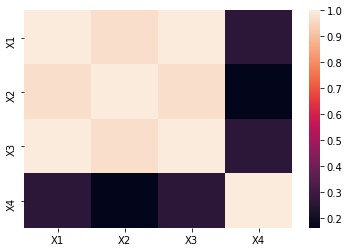

In [ ]:
sns.heatmap(corr)

In [ ]:
# Correlation matrix size
corr.shape

(4, 4)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = data.columns[columns]
selected_columns.shape

(2,)

In [ ]:
data = data[selected_columns]
print(data)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1
